In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dentate.plot import clean_axes

In [3]:
p_width = 2./3
field_width_params = [35.0,   0.32]  # slope, tau

In [4]:
positions = np.linspace(0, 1, 1000)
offsets = np.linspace(0, 1, 10)
field_width = lambda x: 40. + field_width_params[0] * (np.exp(x / field_width_params[1]) - 1.)
widths = [field_width(x) for x in offsets]
p_module = lambda width, offset: lambda x: np.exp(-((x - offset) / (width / 3. / np.sqrt(2.))) ** 2.)
p_modules = [p_module(p_width, offset)(positions) for offset in offsets]
p_sum = np.sum(p_modules, axis=0)
expected_width = np.array(widths).dot(p_modules) / p_sum

<IPython.core.display.Javascript object>


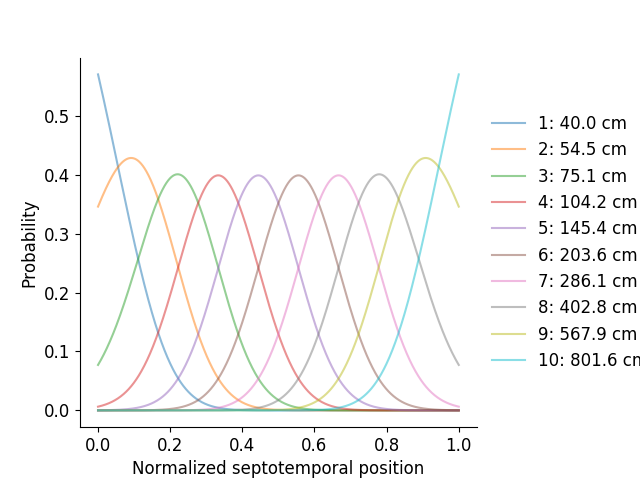

<IPython.core.display.Javascript object>


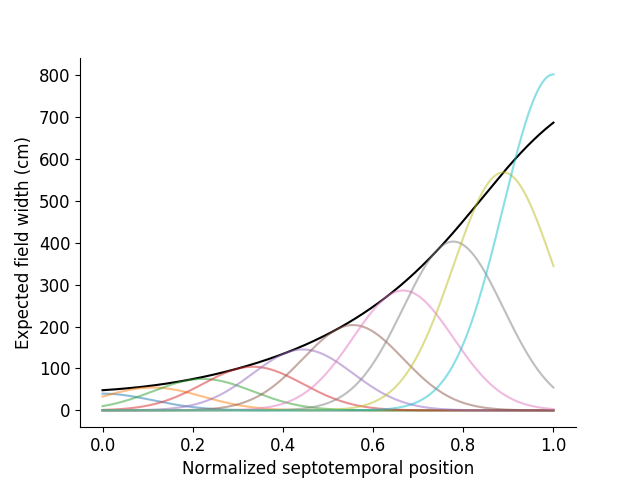

In [5]:
fig1, axes1 = plt.subplots()
fig2, axes2 = plt.subplots()

for i, (this_p, this_width) in enumerate(zip(p_modules, widths)):
    axes1.plot(positions, this_p / p_sum, label='%i: %.1f cm' % (i + 1, this_width), alpha=0.5)
    axes2.plot(positions, this_p * this_width, alpha=0.5)
axes2.plot(positions, expected_width, c='k', zorder=0)
axes1.set_ylabel('Probability')
axes1.set_xlabel('Normalized septotemporal position')
box1 = axes1.get_position()
axes1.set_position([box1.x0, box1.y0, box1.width * 0.8, box1.height])
axes1.legend(loc='center left', frameon=False, framealpha=0.5, bbox_to_anchor=(1, 0.5))
axes2.set_ylabel('Expected field width (cm)')
axes2.set_xlabel('Normalized septotemporal position')
clean_axes([axes1, axes2])

fig1.show()
fig2.show()